# OpenSBLI Benchmark

This notebook compares the peformance of the OpenSBLI Taylor-Green vortex benchmark on different systems.

Performance is compared using iterations per second.

## Setup Section

In [15]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [16]:
import sys
sys.path.append('../../../python-modules')

In [17]:
from appanalysis import osbli

## Read data files

### ARCHER

In [18]:
archerfiles = {5:'../TGV1024ss/results/ARCHER/output_5nodes.txt',
               20:'../TGV1024ss/results/ARCHER/output_20nodes_201711250859.txt',
               40:'../TGV1024ss/results/ARCHER/output_40nodes_201711250903.txt',
               80:'../TGV1024ss/results/ARCHER/output_80nodes.txt',
               160:'../TGV1024ss/results/ARCHER/output_160nodes.txt',
               256:'../TGV1024ss/results/ARCHER/output_256nodes.txt',
               384:'../TGV1024ss/results/ARCHER/output_384nodes.txt',
               512:'../TGV1024ss/results/ARCHER/output_512nodes.txt',
               640:'../TGV1024ss/results/ARCHER/output_640nodes.txt',
               768:'../TGV1024ss/results/ARCHER/output_768nodes.txt',
               896:'../TGV1024ss/results/ARCHER/output_896nodes.txt',
               }

In [19]:
archercpn = 24
archernodes, archertime, archerperf = osbli.calcperf(archerfiles, archercpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              5             120            18.9                0.053
             20             480             4.7                0.213
             40             960             2.5                0.403
             80            1920             2.0                0.509
            160            3840             0.5                1.919
            256            6144             0.4                2.737
            384            9216             0.2                4.262
            512           12288             0.2                5.542
            640           15360             0.2                5.430
            768           18432             0.1                7.924
            896           21504             0.1                9.524


### Cirrus

In [20]:
cirrusfiles = {2:'../TGV1024ss/results/Cirrus/output_2nodes.txt',
               4:'../TGV1024ss/results/Cirrus/output_4nodes.txt',
               8:'../TGV1024ss/results/Cirrus/output_8nodes.txt',
               16:'../TGV1024ss/results/Cirrus/output_16nodes.txt',
               32:'../TGV1024ss/results/Cirrus/output_32nodes.txt'
               }

In [21]:
cirruscpn = 36
cirrusnodes, cirrustime, cirrusperf = osbli.calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              2              72            32.3                0.031
              4             144            17.9                0.056
              8             288             7.8                0.128
             16             576             4.1                0.243
             32            1152             2.3                0.429


### Thomas

In [22]:
thomasfiles = {2:'../TGV1024ss/results/Thomas/output_2nodes_201803160902.txt',
               4:'../TGV1024ss/results/Thomas/output_4nodes_201803160944.txt',
               8:'../TGV1024ss/results/Thomas/output_8nodes_201803160954.txt',
               16:'../TGV1024ss/results/Thomas/output_16nodes_201803161020.txt'
               }

In [23]:
thomascpn = 24
thomasnodes, thomastime, thomasperf = osbli.calcperf(thomasfiles, thomascpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              2              48            74.0                0.014
              4              96            29.0                0.035
              8             192            15.5                0.064
             16             384             7.1                0.141


### Peta4-Skylake

In [24]:
csd3sfiles = {2:'../TGV1024ss/results/CSD3Skylake/output_2nodes_201812131823.txt',
              4:'../TGV1024ss/results/CSD3Skylake/output_4nodes_201812131927.txt',
              8:'../TGV1024ss/results/CSD3Skylake/output_8nodes_201812131943.txt',
              16:'../TGV1024ss/results/CSD3Skylake/output_16nodes_201812132016.txt',
              32:'../TGV1024ss/results/CSD3Skylake/output_32nodes_201812140855.txt',
             }

In [25]:
csd3scpn = 32
csd3snodes, csd3stime, csd3sperf = osbli.calcperf(csd3sfiles, csd3scpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              2              64            24.9                0.040
              4             128            11.5                0.087
              8             256             5.8                0.172
             16             512             2.8                0.352
             32            1024             1.5                0.650


## Plot performance

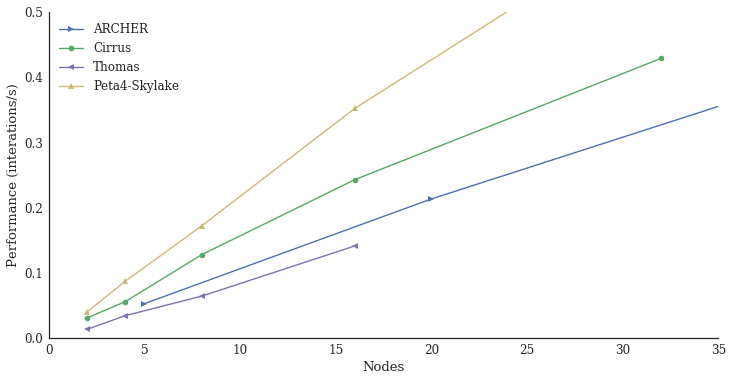

In [26]:
plt.plot(archernodes, archerperf, '>-', color=cols[0], label='ARCHER')
plt.plot(cirrusnodes, cirrusperf, 'o-', color=cols[1], label='Cirrus')
plt.plot(thomasnodes, thomasperf, '<-', color=cols[3], label='Thomas')
plt.plot(csd3snodes, csd3sperf, '^-', color=cols[4], label='Peta4-Skylake')
plt.xlim([0,35])
plt.ylim([0,0.5])
plt.xlabel('Nodes')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()
plt.savefig('osbli_tgv_perf.png', dpi=300)

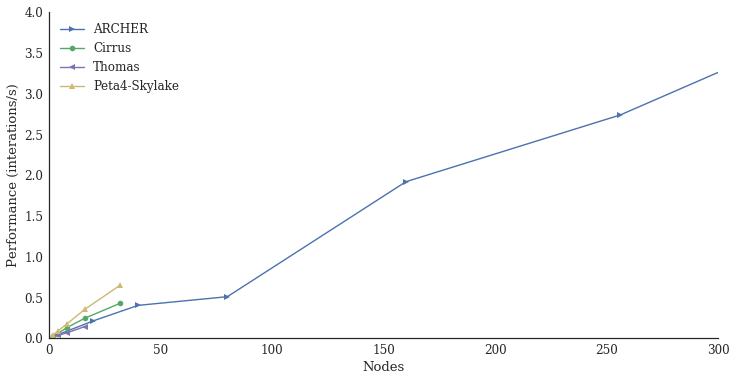

In [27]:
plt.plot(archernodes, [1/x for x in archertime], '>-', color=cols[0], label='ARCHER')
plt.plot(cirrusnodes, [1/x for x in cirrustime], 'o-', color=cols[1], label='Cirrus')
plt.plot(thomasnodes, [1/x for x in thomastime], '<-', color=cols[3], label='Thomas')
plt.plot(csd3snodes, [1/x for x in csd3stime], '^-', color=cols[4], label='Peta4-Skylake')
plt.xlim([0,300])
plt.ylim([0,4])
plt.xlabel('Nodes')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()
plt.savefig('osbli_tgv_perf_large.png', dpi=300)